In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
from functools import partial
import numpy as np

import cubehelix
import palettable
from astropy.coordinates import Distance
import astropy.units as u
import matplotlib.pyplot as plt
import matplotlib as mpl

from padova import AgeGridRequest
from padova.isocdata import join_isochrone_sets

In [2]:
def build_phat_filter_set(**kwargs):
    r_wfc3 = AgeGridRequest(photsys='wfc3_wide', **kwargs)
    r_acs = AgeGridRequest(photsys='acs_wfc', **kwargs)
    isoc_set = join_isochrone_sets(r_wfc3.isochrone_set,
                                   r_acs.isochrone_set,
                                   left_bands=['F275W1', 'F336W', 'F110W', 'F160W'],
                                   right_bands=['F475W', 'F814W'])
    return isoc_set

get_age_grid = partial(build_phat_filter_set,
                       z=0.019, min_log_age=6.6, max_log_age=10.13, delta_log_age=0.1)

In [3]:
def plot_isoc_grid(isoc_set):
    fig = plt.figure(figsize=(12, 5))
    gs = mpl.gridspec.GridSpec(1, 3, wspace=0.3)
    ax_uv = fig.add_subplot(gs[0])
    ax_opt = fig.add_subplot(gs[1])
    ax_ir = fig.add_subplot(gs[2])

    cmap = cubehelix.cmap(startHue=240, endHue=-300, minSat=1, maxSat=2.5, minLight=.3, maxLight=.8, gamma=.9)
    scalar_map = mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=7., vmax=10.1),
                                       cmap=cmap)
    scalar_map.set_array(np.array([isoc.age for isoc in isoc_set]))

    d = Distance(785 * u.kpc)
    for isoc in isoc_set:
        ax_uv.plot(isoc['F275W1'] - isoc['F336W'], isoc['F336W'] + d.distmod.value,
                 c=scalar_map.to_rgba(np.log10(isoc.age)))
        ax_opt.plot(isoc['F475W'] - isoc['F814W'], isoc['F814W'] + d.distmod.value,
                    c=scalar_map.to_rgba(np.log10(isoc.age)))
        ax_ir.plot(isoc['F110W'] - isoc['F160W'], isoc['F160W'] + d.distmod.value,
                   c=scalar_map.to_rgba(np.log10(isoc.age)))
    cb = plt.colorbar(mappable=scalar_map, cax=None, ax=ax_ir)
    cb.set_label(r"$\log(A/\mathrm{yr})$")
    ax_uv.set_xlim(-1.2, 5.5)
    ax_uv.set_ylim(36., 12.)
    ax_uv.set_xlabel("F275W-F336W")
    ax_uv.set_ylabel("F336W")
    ax_opt.set_xlim(-1, 5.5)
    ax_opt.set_ylim(36., 12.)
    ax_opt.set_xlabel("F475W-F814W")
    ax_opt.set_ylabel("F814W")
    ax_ir.set_xlim(-0.5, 1.2)
    ax_ir.set_ylim(32., 12.)
    ax_ir.set_xlabel("F110W-F110W")
    ax_ir.set_ylabel("F110W")
    fig.show()

In [4]:
def plot_isoc_grid_phases(isoc_set):
    phase_labels = {0: 'Pre-MS', 1: 'MS', 2: 'SGB', 3: 'RGB',
                    4: 'CHeB(1)', 5: 'CHeB(2)', 6: 'CHeB(3)',
                    7: 'E-AGB', 8: 'TP-AGB'}
    fig = plt.figure(figsize=(12, 5))
    gs = mpl.gridspec.GridSpec(1, 3, wspace=0.3)
    ax_uv = fig.add_subplot(gs[0])
    ax_opt = fig.add_subplot(gs[1])
    ax_ir = fig.add_subplot(gs[2])

    cmap = mpl.colors.ListedColormap(palettable.colorbrewer.qualitative.Set1_9.mpl_colors)
    scalar_map = mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=-0.5, vmax=8.5),
                                       cmap=cmap)
    scalar_map.set_array(np.array(range(0, 9)))

    d = Distance(785 * u.kpc)
    for isoc in isoc_set:
        phases = np.unique(isoc['stage'])
        srt = np.argsort(phases)
        phases = phases[srt]
        for p in phases:
            s = np.where(isoc['stage'] == p)[0]
            ax_uv.plot(isoc['F275W1'][s] - isoc['F336W'][s], isoc['F336W'][s] + d.distmod.value,
                       c=scalar_map.to_rgba(p))
            ax_opt.plot(isoc['F475W'][s] - isoc['F814W'][s], isoc['F814W'][s] + d.distmod.value,
                        c=scalar_map.to_rgba(p))
            ax_ir.plot(isoc['F110W'][s] - isoc['F160W'][s], isoc['F160W'][s] + d.distmod.value,
                       c=scalar_map.to_rgba(p))
    cb = plt.colorbar(mappable=scalar_map, cax=None, ax=ax_ir, ticks=range(0, 9))
    cb.ax.set_yticklabels([phase_labels[p] for p in range(0, 9)])
    cb.set_label(r"Stage")
    ax_uv.set_xlim(-1.2, 5.5)
    ax_uv.set_ylim(36., 12.)
    ax_uv.set_xlabel("F275W-F336W")
    ax_uv.set_ylabel("F336W")
    ax_opt.set_xlim(-1, 5.5)
    ax_opt.set_ylim(36., 12.)
    ax_opt.set_xlabel("F475W-F814W")
    ax_opt.set_ylabel("F814W")
    ax_ir.set_xlim(-0.5, 1.2)
    ax_ir.set_ylim(32., 12.)
    ax_ir.set_xlabel("F110W-F110W")
    ax_ir.set_ylabel("F110W")
    fig.show()

Plot of stellar evolution phases for solar-metallicity isochrones for a grid of ages

/Users/jsick/.virtualenvs/starfish/lib/python2.7/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


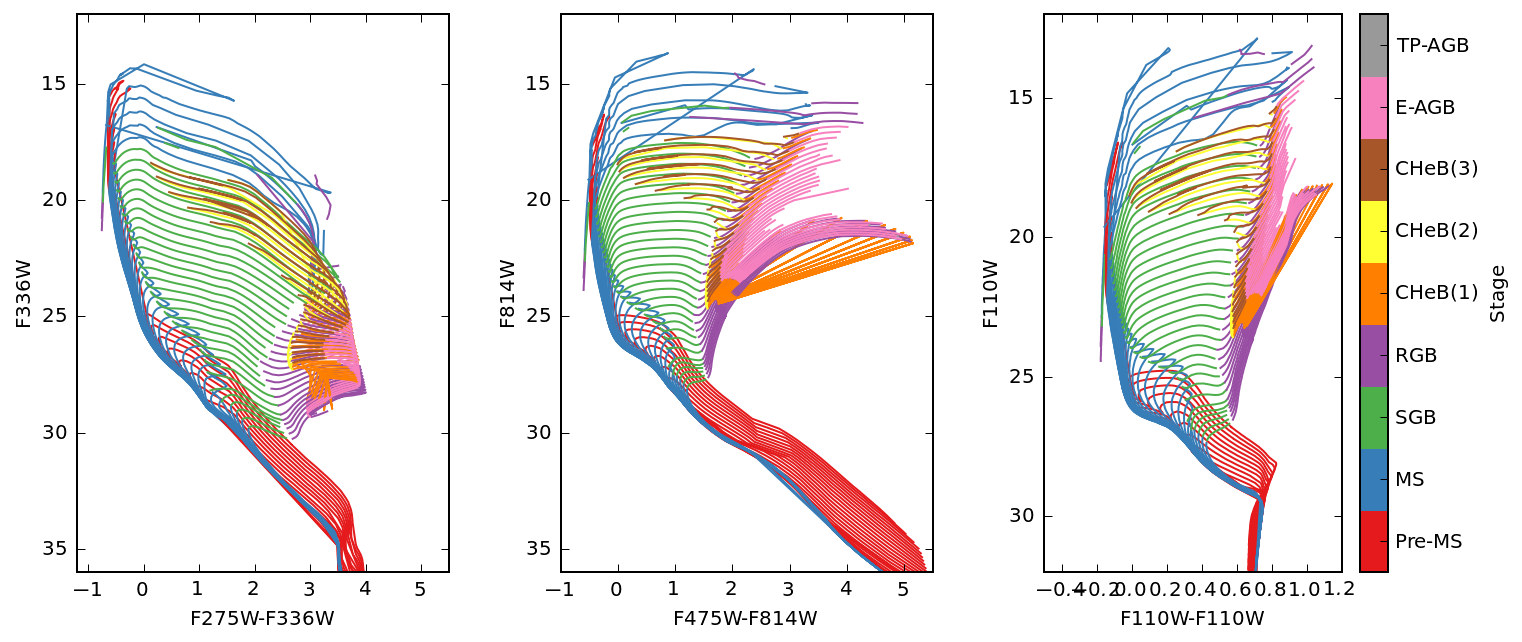

In [5]:
plot_isoc_grid_phases(get_age_grid(isoc_kind='parsec_CAF09_v1.2S', photsys_version='yang'))

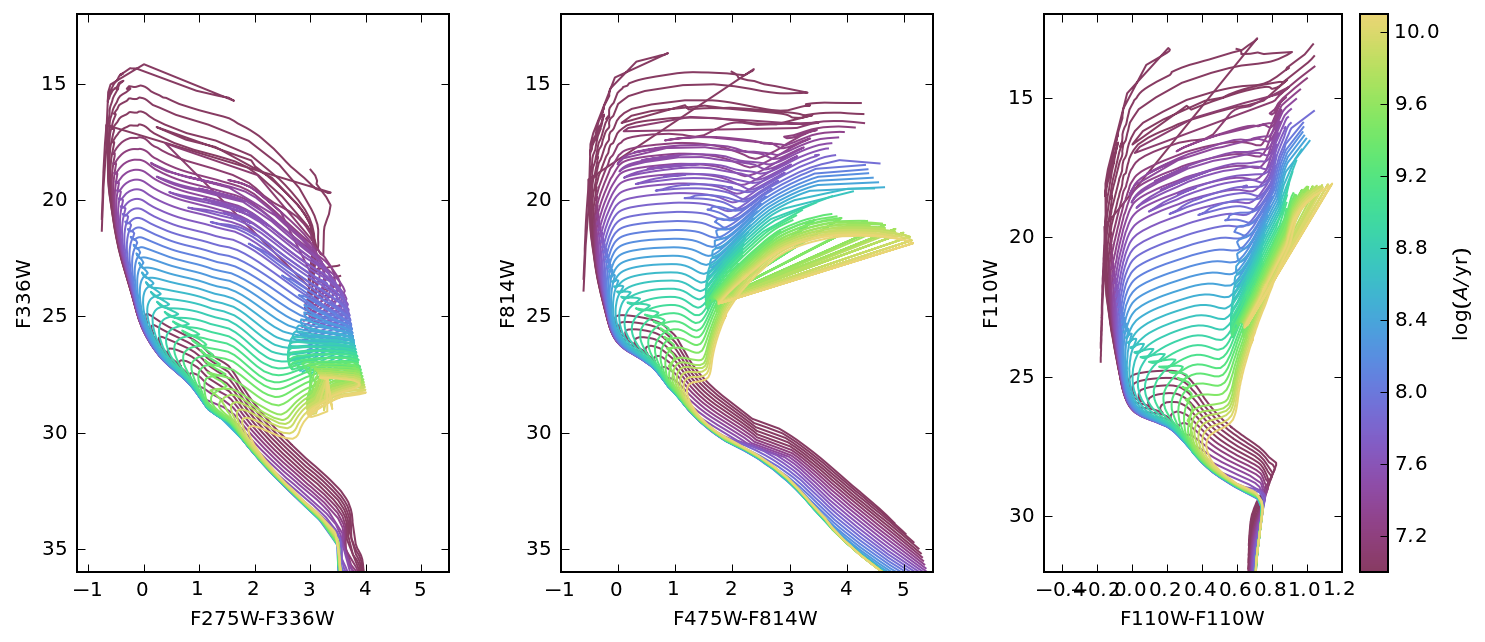

In [7]:
plot_isoc_grid(get_age_grid(isoc_kind='parsec_CAF09_v1.2S', photsys_version='yang'))

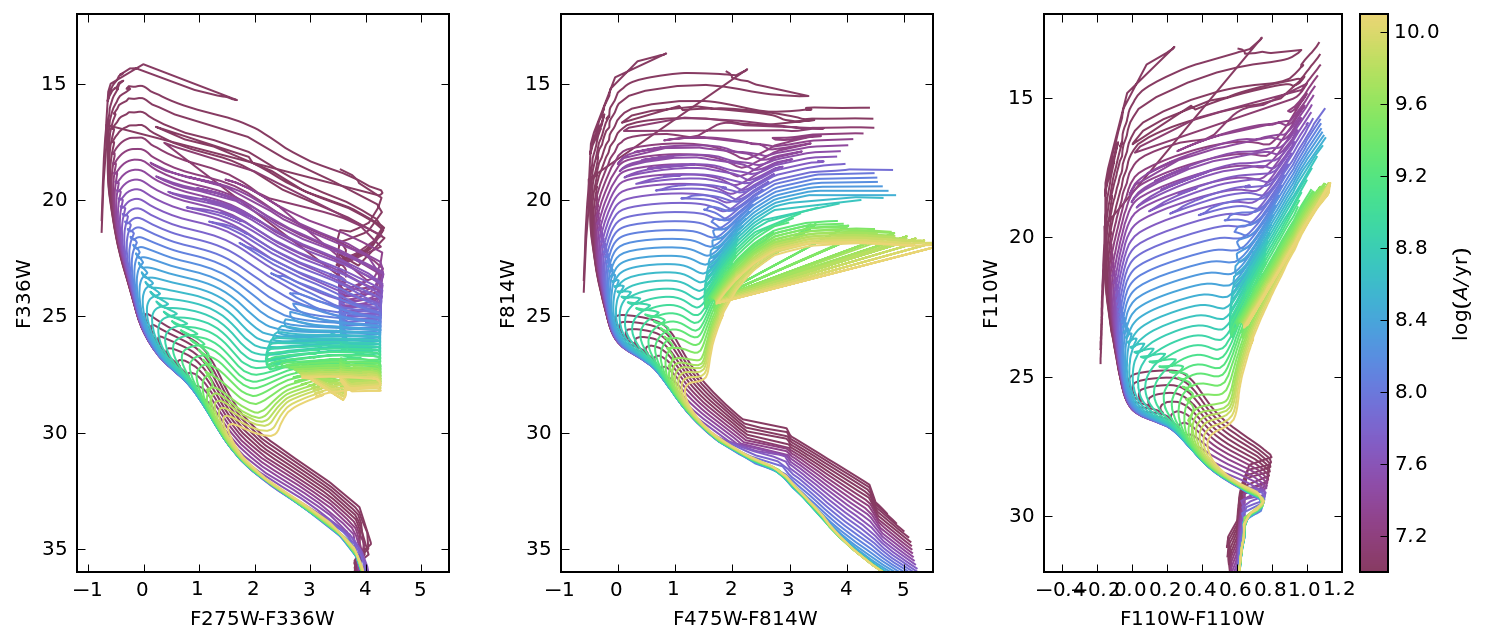

In [6]:
plot_isoc_grid(get_age_grid(isoc_kind='parsec_CAF09_v1.2S', photsys_version='odfnew'))

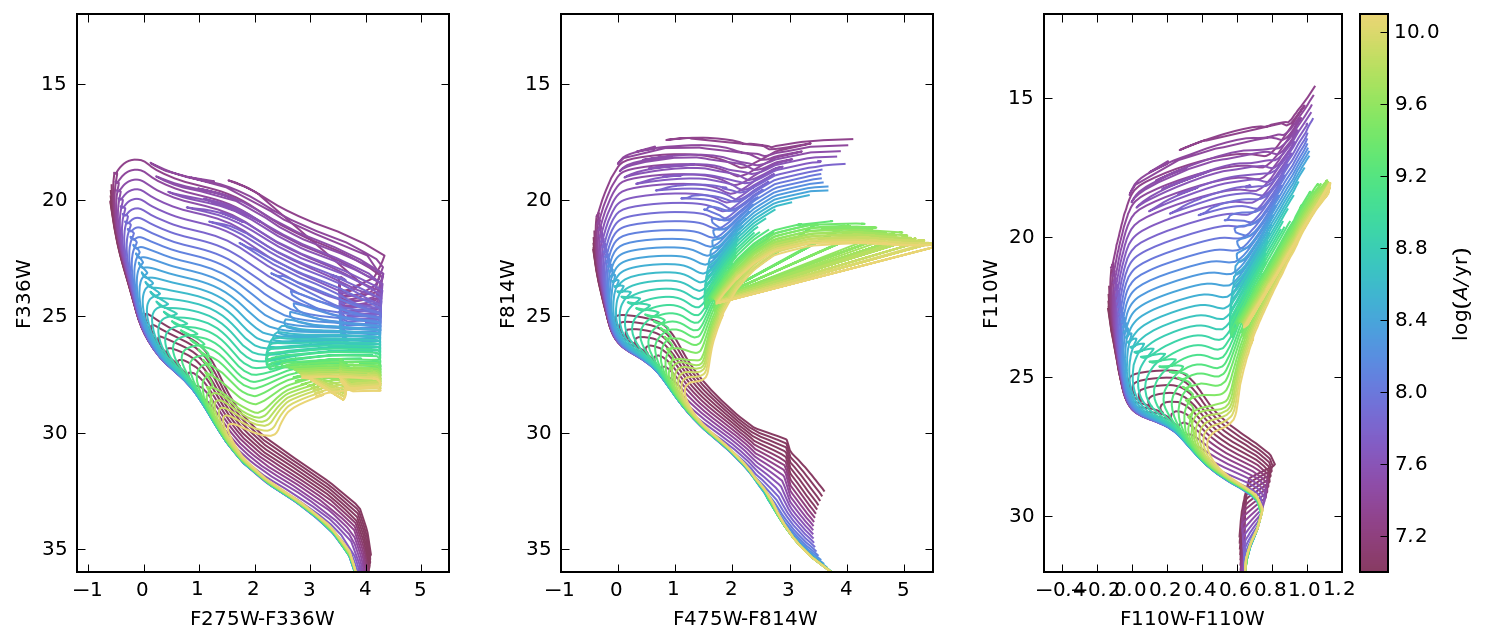

In [8]:
plot_isoc_grid(get_age_grid(isoc_kind='parsec_CAF09_v1.1', photsys_version='odfnew'))

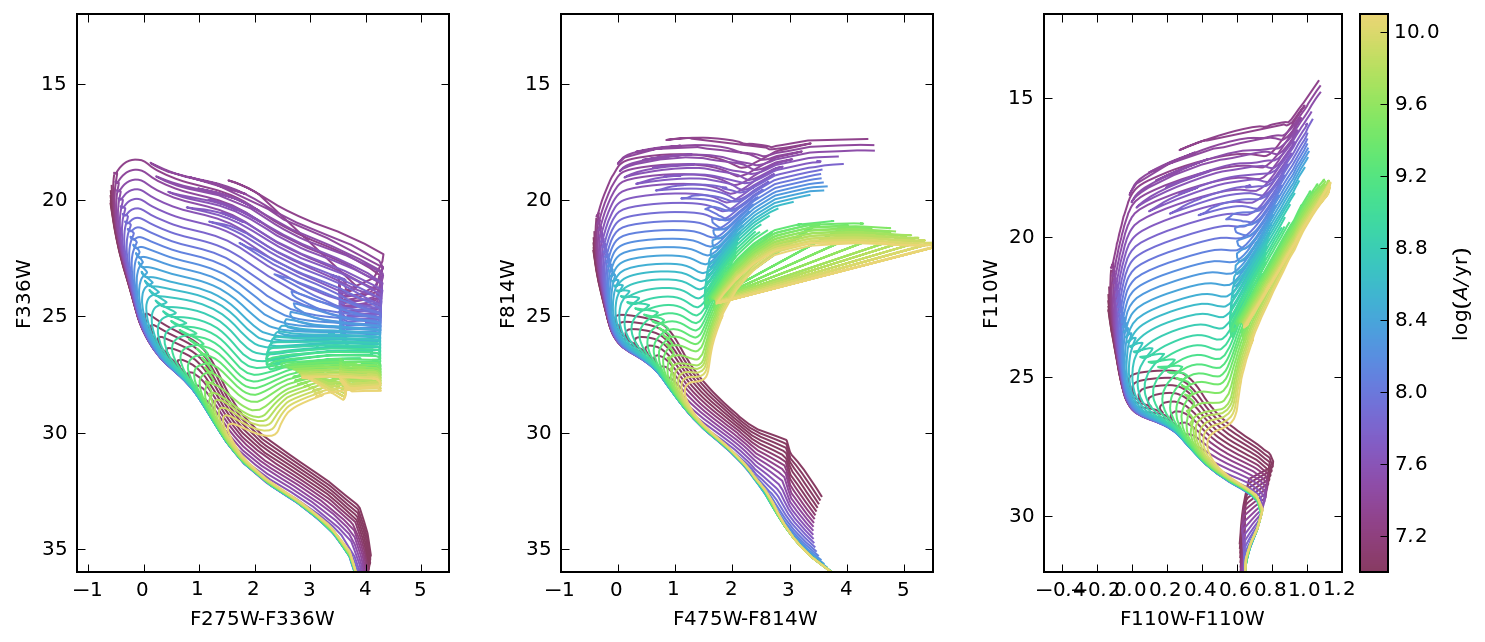

In [9]:
plot_isoc_grid(get_age_grid(isoc_kind='parsec_CAF09_v1.0', photsys_version='odfnew'))

In [10]:
# Doesn't work with padova api for some reason
# plot_isoc_grid(get_age_grid(isoc_kind='gi2000', photsys_version='yang'))

In [11]:
# plot_isoc_grid(get_age_grid(isoc_kind='ma08', photsys_version='odfnew'))

In [12]:
# plot_isoc_grid(get_age_grid(isoc_kind='gi2000', photsys_version='odfnew'))